In [1]:
import json
import pandas as pd
import psycopg2

In [2]:
# import dataset as dataframe from json file
df = pd.read_json('real_estate.json')
df.head(5)

,addressLine1,city,state,zipCode,formattedAddress,bedrooms,squareFootage,yearBuilt,features,county,...,propertyTaxes,lastSalePrice,lastSaleDate,owner,id,longitude,latitude,subdivision,zoning,addressLine2
0,511 John St,Bryan,OH,43506,"511 John St, Bryan, OH 43506",3.0,1404.0,1959.0,"{'architectureType': 'Conventional', 'cooling'...",Williams,...,{'2021': {'total': 1799}},105000.0,2000-10-13T00:00:00.000Z,"{'names': ['SUSAN JO KERR'], 'mailingAddress':...","511-John-St,-Bryan,-OH-43506",-84.570163,41.469595,NaN,NaN,NaN
1,1067 Marlin Dr,Rockledge,FL,32955,"1067 Marlin Dr, Rockledge, FL 32955",3.0,2258.0,1966.0,"{'cooling': True, 'coolingType': 'Central', 'e...",Brevard,...,"{'2021': {'total': 1830}, '2022': {'total': 21...",125000.0,2019-08-13T00:00:00.000Z,"{'names': ['GYULA L KISS', 'JULIE A KISS'], 'm...","1067-Marlin-Dr,-Rockledge,-FL-32955",-80.746982,28.342440,MARLIN SUBD,R2,NaN
2,1136 Sullivan Rd,Ogden,UT,84403,"1136 Sullivan Rd, Apt 15, Ogden, UT 84403",NaN,NaN,NaN,{},Weber,...,NaN,NaN,NaN,NaN,"1136-Sullivan-Rd,-Apt-15,-Ogden,-UT-84403",-111.950330,41.204860,NaN,NaN,Apt 15
3,101 Trinity Lakes Dr,Sun City Center,FL,33573,"101 Trinity Lakes Dr, Apt 361, Sun City Center...",NaN,NaN,NaN,{},Hillsborough,...,NaN,NaN,NaN,NaN,"101-Trinity-Lakes-Dr,-Apt-361,-Sun-City-Center...",-82.355936,27.710284,NaN,NaN,Apt 361
4,7843 S Euclid Ave,Chicago,IL,60649,"7843 S Euclid Ave, Apt 1, Chicago, IL 60649",6.0,3345.0,1925.0,"{'architectureType': 'Two Family', 'cooling': ...",Cook,...,{'2020': {'total': 2527}},225000.0,2022-09-23T00:00:00.000Z,"{'names': ['78TH EUCLID LLC,'], 'mailingAddres...","7843-S-Euclid-Ave,-Apt-1,-Chicago,-IL-60649",-87.576879,41.752132,SOUTHFIELD,NaN,Apt 1


In [3]:
df.columns

Index(['addressLine1', 'city', 'state', 'zipCode', 'formattedAddress',
       'bedrooms', 'squareFootage', 'yearBuilt', 'features', 'county',
       'assessorID', 'legalDescription', 'ownerOccupied', 'bathrooms',
       'lotSize', 'propertyType', 'taxAssessment', 'propertyTaxes',
       'lastSalePrice', 'lastSaleDate', 'owner', 'id', 'longitude', 'latitude',
       'subdivision', 'zoning', 'addressLine2'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   addressLine1      500 non-null    object 
 1   city              500 non-null    object 
 2   state             500 non-null    object 
 3   zipCode           500 non-null    int64  
 4   formattedAddress  500 non-null    object 
 5   bedrooms          329 non-null    float64
 6   squareFootage     387 non-null    float64
 7   yearBuilt         342 non-null    float64
 8   features          418 non-null    object 
 9   county            500 non-null    object 
 10  assessorID        326 non-null    object 
 11  legalDescription  317 non-null    object 
 12  ownerOccupied     252 non-null    float64
 13  bathrooms         370 non-null    float64
 14  lotSize           321 non-null    float64
 15  propertyType      416 non-null    object 
 16  taxAssessment     318 non-null    object 
 1

### Data Ceaning


In [8]:
# replace null values
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = df[i].fillna('unknown')
    else:
        df[i] = df[i].fillna(0.0)

In [9]:
df.isnull().sum()

addressLine1        0
city                0
state               0
zipCode             0
formattedAddress    0
bedrooms            0
squareFootage       0
yearBuilt           0
features            0
county              0
assessorID          0
legalDescription    0
ownerOccupied       0
bathrooms           0
lotSize             0
propertyType        0
taxAssessment       0
propertyTaxes       0
lastSalePrice       0
lastSaleDate        0
owner               0
id                  0
longitude           0
latitude            0
subdivision         0
zoning              0
addressLine2        0
dtype: int64

There are NO null values

### Data Transformation

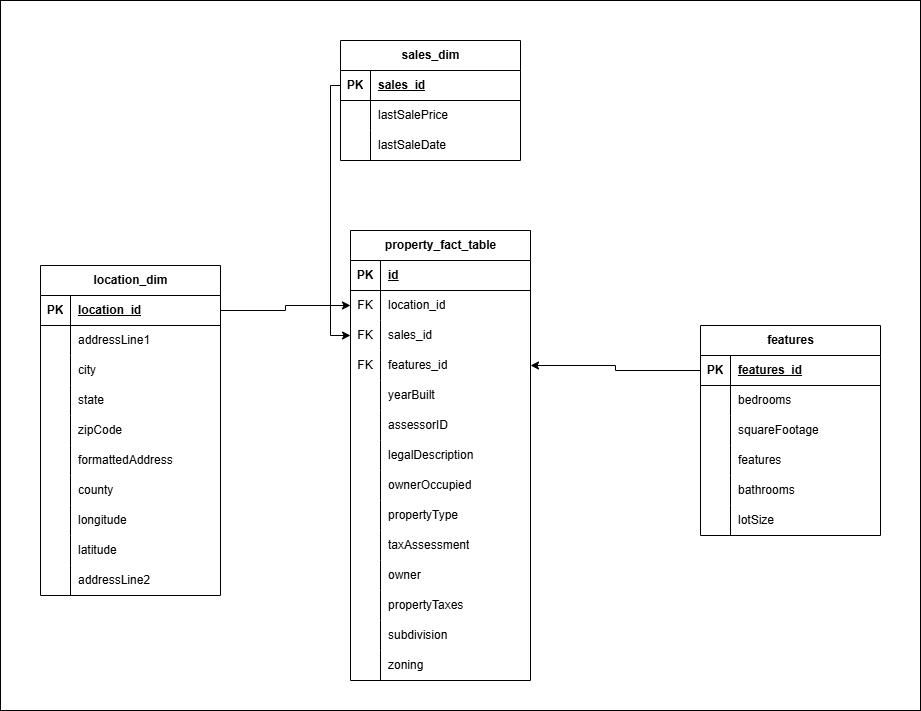

In [10]:
df.columns

Index(['addressLine1', 'city', 'state', 'zipCode', 'formattedAddress',
       'bedrooms', 'squareFootage', 'yearBuilt', 'features', 'county',
       'assessorID', 'legalDescription', 'ownerOccupied', 'bathrooms',
       'lotSize', 'propertyType', 'taxAssessment', 'propertyTaxes',
       'lastSalePrice', 'lastSaleDate', 'owner', 'id', 'longitude', 'latitude',
       'subdivision', 'zoning', 'addressLine2'],
      dtype='object')

In [12]:
# create table location
location = df[['addressLine1', 'city', 'state', 'zipCode', 'formattedAddress',
               'county','longitude', 'latitude','addressLine2']].copy().drop_duplicates().reset_index(drop=True)

# create column location_id
location['location_id'] = range( 1 , len(location)+1)
location = location[ ['location_id'] + [x for x in location.columns if x != 'location_id'] ]
location.head()

,location_id,addressLine1,city,state,zipCode,formattedAddress,county,longitude,latitude,addressLine2
0,1,511 John St,Bryan,OH,43506,"511 John St, Bryan, OH 43506",Williams,-84.570163,41.469595,unknown
1,2,1067 Marlin Dr,Rockledge,FL,32955,"1067 Marlin Dr, Rockledge, FL 32955",Brevard,-80.746982,28.342440,unknown
2,3,1136 Sullivan Rd,Ogden,UT,84403,"1136 Sullivan Rd, Apt 15, Ogden, UT 84403",Weber,-111.950330,41.204860,Apt 15
3,4,101 Trinity Lakes Dr,Sun City Center,FL,33573,"101 Trinity Lakes Dr, Apt 361, Sun City Center...",Hillsborough,-82.355936,27.710284,Apt 361
4,5,7843 S Euclid Ave,Chicago,IL,60649,"7843 S Euclid Ave, Apt 1, Chicago, IL 60649",Cook,-87.576879,41.752132,Apt 1


In [ ]:
#create table sales
sales = df[['lastSalePrice', 'lastSaleDate']].copy().drop_duplicates().reset_index(drop=True)

#create column sales_id
sales['sales_id'] = range(1, len(sales)+1)

sales = sales[ ['sales_id'] + [x for x in sales.columns if x != 'sales_id'] ]
sales.head()

,sales_id,lastSalePrice,lastSaleDate
0,1,105000.0,2000-10-13T00:00:00.000Z
1,2,125000.0,2019-08-13T00:00:00.000Z
2,3,0.0,unknown
3,4,225000.0,2022-09-23T00:00:00.000Z
4,5,0.0,2016-06-27T00:00:00.000Z


In [18]:
#create table features
features = df[['bedrooms', 'squareFootage', 'features', 'bathrooms',
       'lotSize']]

#create column features_id
features['features_id'] = range( 1 , len(features)+1)

features = features[ ['features_id'] + [x for x in features.columns if x != 'features_id'] ]
features.head()

C:\Users\Yathrip\AppData\Local\Temp\ipykernel_2668\3649429307.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['features_id'] = range( 1 , len(features)+1)


,features_id,bedrooms,squareFootage,features,bathrooms,lotSize
0,1,3.0,1404.0,"{'architectureType': 'Conventional', 'cooling'...",2.0,11108.0
1,2,3.0,2258.0,"{'cooling': True, 'coolingType': 'Central', 'e...",2.0,10890.0
2,3,0.0,0.0,{},0.0,0.0
3,4,0.0,0.0,{},0.0,0.0
4,5,6.0,3345.0,"{'architectureType': 'Two Family', 'cooling': ...",3.0,3780.0


In [26]:
#create table property_fact_ttable
property_fact_table = df.merge(location , on=['addressLine1', 'city', 'state', 'zipCode', 'formattedAddress', 'county','longitude', 'latitude','addressLine2'], how='left')\
                        .merge(sales, on=['lastSalePrice', 'lastSaleDate'],how='left')\
                        .merge(features, on=['bedrooms', 'squareFootage', 'bathrooms','lotSize'],how='left') \
                        [['id','location_id','sales_id','features_id','yearBuilt','assessorID','legalDescription', 'ownerOccupied','propertyType', 'taxAssessment', 'propertyTaxes','owner','subdivision', 'zoning']]

property_fact_table

,id,location_id,sales_id,features_id,yearBuilt,assessorID,legalDescription,ownerOccupied,propertyType,taxAssessment,propertyTaxes,owner,subdivision,zoning
0,"511-John-St,-Bryan,-OH-43506",1,1,1,1959.0,063-190-07-006.000,LOT 36 CONNINS HOME ACRES 030-11740-000,1.0,Single Family,"{'2022': {'value': 36510, 'land': 10820, 'impr...",{'2021': {'total': 1799}},"{'names': ['SUSAN JO KERR'], 'mailingAddress':...",unknown,unknown
1,"1067-Marlin-Dr,-Rockledge,-FL-32955",2,2,2,1966.0,25-36-05-52-00008.0-0010.00,MARLIN SUBD LOT 10 BLK 8,0.0,Single Family,"{'2021': {'value': 104510, 'land': 25000, 'imp...","{'2021': {'total': 1830}, '2022': {'total': 21...","{'names': ['GYULA L KISS', 'JULIE A KISS'], 'm...",MARLIN SUBD,R2
2,"1136-Sullivan-Rd,-Apt-15,-Ogden,-UT-84403",3,3,3,0.0,unknown,unknown,0.0,unknown,unknown,unknown,unknown,unknown,unknown
3,"1136-Sullivan-Rd,-Apt-15,-Ogden,-UT-84403",3,3,4,0.0,unknown,unknown,0.0,unknown,unknown,unknown,unknown,unknown,unknown
4,"1136-Sullivan-Rd,-Apt-15,-Ogden,-UT-84403",3,3,13,0.0,unknown,unknown,0.0,unknown,unknown,unknown,unknown,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,"76321-Louis-Quave-Rd,-Covington,-LA-70435",496,275,496,2011.0,116-810-3021,2 ACS PARCEL A SEC 10 06 12 INST NO 976859 INS...,1.0,Single Family,"{'2021': {'value': 27499, 'land': 3250, 'impro...",{'2022': {'total': 2864}},"{'names': ['HAROLD D LINDEEN'], 'mailingAddres...",LOUIS QUAVE RD,unknown
8516,"1661-E-Cardinal-Dr,-Casa-Grande,-AZ-85122",497,276,497,2004.0,505-87-0130,MISSION VALLEY PHASE 1A LOT 13 SEC 10-6S-6E 70...,1.0,Single Family,"{'2022': {'value': 14331, 'land': 2112, 'impro...","{'2020': {'total': 1248}, '2022': {'total': 12...","{'names': ['STEVE H NEROVICH'], 'mailingAddres...",MISSION VALLEY PHASE 1A,unknown
8517,"409-Town-Woods-Trce,-Summerville,-SC-29483",498,277,498,2007.0,121-15-04-022,BLACKBERRY CREEK\ 409 TOWN WOODS TRCE BLACKBER...,1.0,Single Family,"{'2022': {'value': 10530, 'land': 1840, 'impro...",{'2022': {'total': 1915}},"{'names': ['JOHN DYCUS', 'CHRISTINE M DYCUS'],...",BLACKBERRY CREEK,unknown
8518,"2414-Lake-Park-Rd,-Apt-3204,-Lexington,-KY-40502",499,278,499,1973.0,38217650,G-960 LAKES EDGE CONDOMINIUM HOMES LOT; BOOK: ...,0.0,Condo,{'2022': {'value': 148500}},{'2022': {'total': 1897}},"{'names': ['ZEV PROPERTIES LLC'], 'mailingAddr...",LAKES EDGE CONDOMINIUM HOMES,R-4


In [28]:
property_fact_table = property_fact_table.drop_duplicates(subset='id')

In [ ]:
# check for uniqueness
print(property_fact_table['id'].duplicated().any()) #primary key must have false duplicates
print(property_fact_table['location_id'].duplicated().any())
print(property_fact_table['sales_id'].duplicated().any())
print(property_fact_table['features_id'].duplicated().any())

False
False
True
True


### Data Loading in PostgerSQL

In [32]:
# Define database connection parameters including the database name
db_params = {
    'username':'postgres',
    'password':'ahly9667',
    'host':'localhost',
    'port':'5432',
    'database':'zuma_realtor'
}
default_db_url =f"postgresql://{db_params['username']}:{db_params['password']}@{db_params['host']}:{db_params['port']}/postgres"

#create database
try:
    # open the connection
    conn = psycopg2.connect(default_db_url)
    conn.autocommit = True
    cur = conn.cursor()

#check if the database is already existed
    cur.execute(f"select 1 from pg_catalog.pg_database where datname='{db_params['database']}'")
    exists = cur.fetchone()
    if not exists:
        # Create the database
        cur.execute(f"create database {db_params['database']}")
        print(f"Database {db_params['database']} created successfully")

    else:
        print(f"Database {db_params['database']} already existed")

    # Close the cnnection
    cur.close()
    conn.close()
except exception as e :
    print(f"an error {e} occurred")

Database zuma_realtor created successfully


In [33]:
# Connect to the new created database zuma realtor
def db_connected():
    connection = psycopg2.connect(user = 'postgres', 
                                  host= 'localhost',
                                  password = 'ahly9667',
                                  port = 5432,
                                  database ='zuma_realtor')

    return connection

conn = db_connected()

In [76]:
#create a function to create tables of Schema
def create_tables():
    conn = db_connected()
    cursor = conn.cursor()
    query = """ 
                 drop table if exists location cascade;
                 drop table if exists sales cascade;
                 drop table if exists features cascade;
                 drop table if exists property_fact_table cascade;

                 create table location(
                 location_id int primary key,
                 addressLine1 varchar(255),
                 city varchar(255),
                 state varchar(255),
                 zipCode int,
                 formattedAddress varchar(255),
                 county varchar(255),
                 longitude float,
                 latitude float,
                  addressLine2 varchar(255));

                  create table sales(
                  sales_id int primary key,
                  lastSalePrice float,
                  lastSaleDate varchar(255)
                  );

                  create table features(
                  features_id int primary key,
                  bedrooms float,
                  squareFootage float,
                  features varchar(100000),
                  bathrooms float,
                  lotSize float
                  );

                  create table property_fact_table(
                   id varchar(255) primary key,
                   location_id int,
                   sales_id int,
                   features_id int,
                   yearBuilt float,
                   assessorID varchar(10000),
                   legalDescription varchar(10000),
                   ownerOccupied float,
                   propertyType varchar(10000),
                   taxAssessment  varchar(10000),
                   propertyTaxes varchar(10000),
                   owner varchar(10000),
                   subdivision varchar(10000),
                   zoning varchar(10000),
                   foreign key (location_id) references location(location_id),
                   foreign key (sales_id) references sales(sales_id),
                   foreign key (features_id) references features(features_id) 

                  );
            """

    cursor.execute(query)
    conn.commit()
    cursor.close()
    conn.close()      
                 
create_tables()                
print('Tables created successfilly')          

Tables created successfilly


In [77]:
# insert records in location table
def load_records():
    conn = db_connected()
    cursor = conn.cursor()
    
    for _,row in location.iterrows():
            try:
                cursor.execute(""" insert into location(location_id, 
                               addressLine1,
                               city,
                               state,
                               zipCode,
                               formattedAddress,
                               county,
                               longitude,
                               latitude,
                               addressLine2) values(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s); """ ,
                               ( row['location_id'],row['addressLine1'],row['city'],row['state'],row['zipCode'],row['formattedAddress'],\
                                row['county'],row['longitude'],row['latitude'],row['addressLine2']) )
                
            except psycopg2.IntegrityError:
                conn.rollback()
            else:
                conn.commit()

    conn.commit()
    cursor.close()
    conn.close()

load_records()
print('Records loaded successfully')

Records loaded successfully


In [78]:
# load records in sales table
def load_records():
    conn = db_connected()
    cursor = conn.cursor()
    for _,row in sales.iterrows():
        try:
            cursor.execute(""" insert into sales(sales_id,lastSalePrice,lastSaleDate)
                           values(%s,%s,%s);""" ,
                            (row['sales_id'],row['lastSalePrice'],row['lastSaleDate']) )

        except psycopg2.IntegrityError:
            conn.rollback()
        else:
            conn.commit() 

    conn.commit()
    cursor.close()
    conn.close()

load_records()
print('Records loaded successfully')      

Records loaded successfully


In [ ]:
# convert dict string type to string type to insert into sql table
features['features'] = features['features'].astype(str)

In [79]:
#load records in features table
def load_records():
     conn = db_connected()
     cursor = conn.cursor()
     for _ ,row in features.iterrows():
           try:

               cursor.execute(""" insert into features(features_id,
                         bedrooms,
                         squareFootage,
                         features,
                         bathrooms,
                         lotSize)
                         values(%s,%s,%s,%s,%s,%s);""" ,
                         ( row['features_id'],row['bedrooms'],row['squareFootage'], \
                         row['features'],row['bathrooms'],row['lotSize'] ) )
               
           except psycopg2.IntegrityError:
                      
                      conn.rollback()
           else:
                    conn.commit()    

     conn.commit()
     cursor.close()
     conn.close()

load_records()
print('Records loaded successfully')    


Records loaded successfully


In [105]:
# convert dict string type to string type to insert into sql table
property_fact_table['taxAssessment'] = property_fact_table['taxAssessment'].astype(str)
property_fact_table['owner'] = property_fact_table['owner'].astype(str)
property_fact_table['propertyTaxes'] = property_fact_table['propertyTaxes'].astype(str)

C:\Users\Yathrip\AppData\Local\Temp\ipykernel_2668\1854797552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_fact_table['taxAssessment'] = property_fact_table['taxAssessment'].astype(str)
C:\Users\Yathrip\AppData\Local\Temp\ipykernel_2668\1854797552.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_fact_table['owner'] = property_fact_table['owner'].astype(str)
C:\Users\Yathrip\AppData\Local\Temp\ipykernel_2668\1854797552.py:4: SettingWithCopyWarning: 
A value is trying to be set on 

In [106]:
#load records in property fact table
def load_records():
     conn = db_connected()
     cursor = conn.cursor()
     for _ ,row in property_fact_table.iterrows():
          try:
                 cursor.execute(""" insert into property_fact_table(id, location_id, sales_id, features_id, yearBuilt,
                                assessorID, legalDescription, ownerOccupied, propertyType,
                                taxAssessment, propertyTaxes, owner, subdivision, zoning)
                                values(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)""" ,
                                (row['id'],row['location_id'],row['sales_id'],row['features_id'],row['yearBuilt'],row['assessorID'],row['legalDescription'],\
                                 row['ownerOccupied'],row['propertyType'],row['taxAssessment'],row['propertyTaxes']\
                                 ,row['owner'],row['subdivision'],row[ 'zoning'])  )

          except psycopg2.IntegrityError :
                 
                   conn.rollback()
          else:
                  
                  conn.commit()     

     conn.commit()
     cursor.close()
     conn.close()
     
load_records()
print('Records loaded successfully')                          

Records loaded successfully


In [108]:
#check for records
con = psycopg2.connect(user = 'postgres', 
                                  host= 'localhost',
                                  password = 'ahly9667',
                                  port = 5432,
                                  database ='zuma_realtor')
cur = con.cursor()
query = """ select * from property_fact_table;
"""
cur.execute(query)
result = cur.fetchall()
output = pd.DataFrame(result , columns= [i[0] for i in cur.description])
output

,id,location_id,sales_id,features_id,yearbuilt,assessorid,legaldescription,owneroccupied,propertytype,taxassessment,propertytaxes,owner,subdivision,zoning
0,"511-John-St,-Bryan,-OH-43506",1,1,1,1959.0,063-190-07-006.000,LOT 36 CONNINS HOME ACRES 030-11740-000,1.0,Single Family,"{'2022': {'value': 36510, 'land': 10820, 'impr...",{'2021': {'total': 1799}},"{'names': ['SUSAN JO KERR'], 'mailingAddress':...",unknown,unknown
1,"1067-Marlin-Dr,-Rockledge,-FL-32955",2,2,2,1966.0,25-36-05-52-00008.0-0010.00,MARLIN SUBD LOT 10 BLK 8,0.0,Single Family,"{'2021': {'value': 104510, 'land': 25000, 'imp...","{'2021': {'total': 1830}, '2022': {'total': 21...","{'names': ['GYULA L KISS', 'JULIE A KISS'], 'm...",MARLIN SUBD,R2
2,"1136-Sullivan-Rd,-Apt-15,-Ogden,-UT-84403",3,3,3,0.0,unknown,unknown,0.0,unknown,unknown,unknown,unknown,unknown,unknown
3,"101-Trinity-Lakes-Dr,-Apt-361,-Sun-City-Center...",4,3,3,0.0,unknown,unknown,0.0,unknown,unknown,unknown,unknown,unknown,unknown
4,"7843-S-Euclid-Ave,-Apt-1,-Chicago,-IL-60649",5,4,5,1925.0,20-25-331-015,DIST:70 CITY/MUNI/TWP:HYDE PARK SEC/TWN/RNG/ME...,1.0,Apartment,"{'2020': {'value': 14447, 'land': 3402, 'impro...",{'2020': {'total': 2527}},"{'names': ['78TH EUCLID LLC,'], 'mailingAddres...",SOUTHFIELD,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,"76321-Louis-Quave-Rd,-Covington,-LA-70435",496,275,496,2011.0,116-810-3021,2 ACS PARCEL A SEC 10 06 12 INST NO 976859 INS...,1.0,Single Family,"{'2021': {'value': 27499, 'land': 3250, 'impro...",{'2022': {'total': 2864}},"{'names': ['HAROLD D LINDEEN'], 'mailingAddres...",LOUIS QUAVE RD,unknown
496,"1661-E-Cardinal-Dr,-Casa-Grande,-AZ-85122",497,276,497,2004.0,505-87-0130,MISSION VALLEY PHASE 1A LOT 13 SEC 10-6S-6E 70...,1.0,Single Family,"{'2022': {'value': 14331, 'land': 2112, 'impro...","{'2020': {'total': 1248}, '2022': {'total': 12...","{'names': ['STEVE H NEROVICH'], 'mailingAddres...",MISSION VALLEY PHASE 1A,unknown
497,"409-Town-Woods-Trce,-Summerville,-SC-29483",498,277,498,2007.0,121-15-04-022,BLACKBERRY CREEK\ 409 TOWN WOODS TRCE BLACKBER...,1.0,Single Family,"{'2022': {'value': 10530, 'land': 1840, 'impro...",{'2022': {'total': 1915}},"{'names': ['JOHN DYCUS', 'CHRISTINE M DYCUS'],...",BLACKBERRY CREEK,unknown
498,"2414-Lake-Park-Rd,-Apt-3204,-Lexington,-KY-40502",499,278,499,1973.0,38217650,G-960 LAKES EDGE CONDOMINIUM HOMES LOT; BOOK: ...,0.0,Condo,{'2022': {'value': 148500}},{'2022': {'total': 1897}},"{'names': ['ZEV PROPERTIES LLC'], 'mailingAddr...",LAKES EDGE CONDOMINIUM HOMES,R-4


In [109]:
con = psycopg2.connect(user = 'postgres', 
                                  host= 'localhost',
                                  password = 'ahly9667',
                                  port = 5432,
                                  database ='zuma_realtor')
cur = con.cursor()
query="""  select city,sum(lastSalePrice) as total_sales from location
join property_fact_table on location.location_id =  property_fact_table.location_id
join sales on property_fact_table.sales_id = sales.sales_id
group by city
order by total_sales desc
"""
cur.execute(query)
result = cur.fetchall()
output = pd.DataFrame(result, columns = [i[0] for i in cur.description])
output

,city,total_sales
0,Clarksville,13450000.0
1,Beverly Hills,4200000.0
2,Oak Brook,2650000.0
3,Clearwater,2387500.0
4,Ocean City,1750000.0
...,...,...
370,Eunice,0.0
371,Casper,0.0
372,Brooklyn Center,0.0
373,Kokomo,0.0


In [117]:
con = psycopg2.connect(user = 'postgres', 
                                  host= 'localhost',
                                  password = 'ahly9667',
                                  port = 5432,
                                  database ='zuma_realtor')
cur = con.cursor()
query = """SELECT 
    EXTRACT(MONTH FROM TO_TIMESTAMP(
        CASE 
            WHEN lastSaleDate ~ '^\\d{4}-\\d{2}-\\d{2}T\\d{2}:\\d{2}:\\d{2}\\.\\d{3}Z$' 
            THEN lastSaleDate
            ELSE '1970-01-01T00:00:00.000Z' -- Use a default date for invalid entries
        END,
        'YYYY-MM-DD"T"HH24:MI:SS.MS"Z"')) AS month,
    SUM(lastSalePrice) AS total_sales_monthly
FROM sales
GROUP BY month
ORDER BY total_sales_monthly DESC;

             """
cur.execute(query)
result = cur.fetchall()
output = pd.DataFrame(result , columns= [i[0] for i in cur.description])
output

,month,total_sales_monthly
0,3,21494535.0
1,10,8957948.0
2,5,7741932.0
3,6,7526300.0
4,4,5333800.0
5,9,5128300.0
6,8,5031617.0
7,11,4088700.0
8,7,3994985.0
9,12,3032453.0


In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

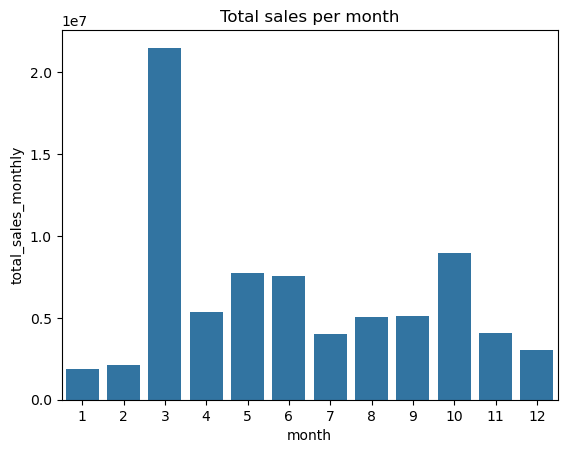

In [121]:
sns.barplot(y=output['total_sales_monthly'] , x=output['month'])
plt.title('Total sales per month')
plt.show()

In [ ]:
con = psycopg2.connect(user = 'postgres', 
                                  host= 'localhost',
                                  password = 'ahly9667',
                                  port = 5432,
                                  database ='zuma_realtor')
cur = con.cursor()
query = ''' select yearbuilt , SUM(lastSalePrice) AS total_sales from property_fact_table
       join sales on property_fact_table.sales_id = sales.sales_id
       group by yearBuilt 
       order by total_sales desc
    '''
cur.execute(query)
result = cur.fetchall()
output = pd.DataFrame(result , columns=[i[0] for i in cur.description])
output

,yearbuilt,total_sales
0,2012.0,13395000.0
1,1936.0,4200000.0
2,1968.0,3565500.0
3,0.0,2885785.0
4,2004.0,2684000.0
...,...,...
104,1945.0,0.0
105,1957.0,0.0
106,1885.0,0.0
107,1901.0,0.0


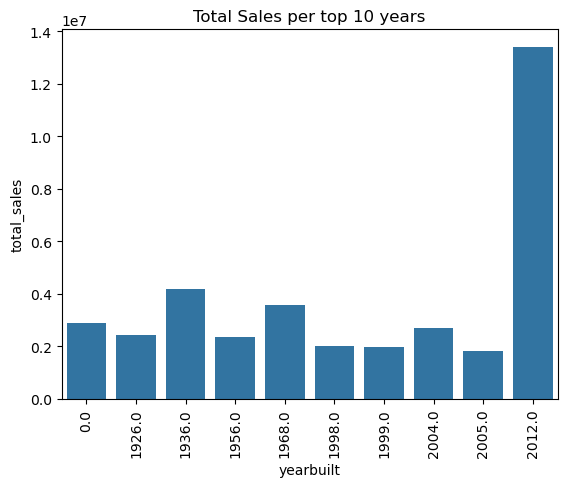

In [146]:
data = output[:10]
sns.barplot(x= data['yearbuilt'] , y= data['total_sales'] )
plt.title('Total Sales per top 10 years')
plt.xticks(rotation = 90)
plt.show()